### PROYECTO 1 - ETAPA 1
**GRUPO 2:** \
Juana Mejía \
Daniela Espinosa 202022615 \
Panblo Ortega

#### Carga de datos

In [30]:
import pandas as pd
df = pd.read_excel('ODScat_345.xlsx')
df.shape

(4049, 2)

#### Perfilamiento de los Datos


In [31]:
# Estadisticas descriptivas
df.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [32]:
# Informacion del data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4049 entries, 0 to 4048
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Textos_espanol  4049 non-null   object
 1   sdg             4049 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 63.4+ KB


Como podemos ver, el dataframe no tiene valores nulos.

In [33]:
# Análisis de duplicados
duplicates = df.duplicated().sum()
print(f"\nNúmero de registros duplicados: {duplicates}")


Número de registros duplicados: 0


Tampoco tiene duplicados.

In [34]:
levels = df.apply(pd.Series.unique)
num_levels = df.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Textos_espanol    [Por ejemplo, el nÃºmero de consultas externas...
sdg                                                       [3, 4, 5]
dtype: object
Textos_espanol    4049
sdg                  3
dtype: int64


La columna sdg contiene valores numéricos y tiene tres ategorías: [3, 4, 5]
Todos los valores de Textos_espanol son de texto y son diferentes.

#### Limpieza de datos

In [35]:
data = df.copy()

In [36]:
# Normalización de textos
data['Textos_espanol'] = data['Textos_espanol'].str.lower()
data['Textos_espanol'] = data['Textos_espanol'].str.replace('[^\w\s]', '', regex=True)

#### Vectorización de textos
Encontrar el número óptimo del máximo de features:

Mejor número de max_features: 8000


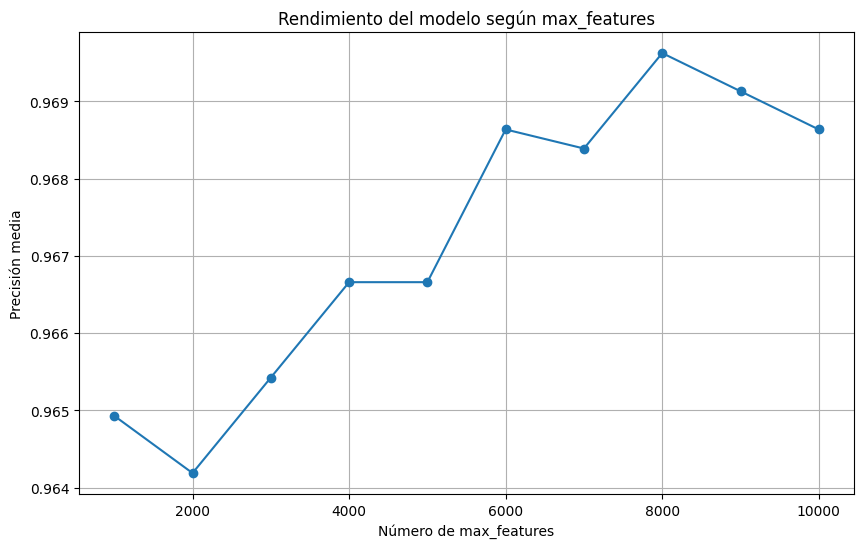

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import make_scorer, accuracy_score
from nltk.corpus import stopwords

# Cargar las palabras de parada en español
spanish_stopwords = stopwords.words('spanish')

# Definir el pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=spanish_stopwords)),
    ('clf', MultinomialNB())
])

# Definir el rango de parámetros para buscar
param_grid = {
    'tfidf__max_features': [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=make_scorer(accuracy_score))

# Ajustar el modelo con el GridSearchCV
grid_search.fit(data['Textos_espanol'], data['sdg'])

# Mejor número de max_features
best_max_features = grid_search.best_params_['tfidf__max_features']
print(f"Mejor número de max_features: {best_max_features}")

import matplotlib.pyplot as plt

# Obtener los resultados de precisión media para cada valor de max_features
mean_scores = grid_search.cv_results_['mean_test_score']

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(param_grid['tfidf__max_features'], mean_scores, marker='o', linestyle='-')
plt.xlabel('Número de max_features')
plt.ylabel('Precisión media')
plt.title('Rendimiento del modelo según max_features')
plt.grid(True)
plt.show()



Vectorizar el texto

In [38]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Cargar las palabras de parada en español
spanish_stopwords = stopwords.words('spanish')

# Vectorización de textos
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords, max_features=best_max_features)
text_vectors = vectorizer.fit_transform(data['Textos_espanol'])
text_data = pd.DataFrame(text_vectors.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenar con el dataset original
data = pd.concat([data.drop(columns=['Textos_espanol']), text_data], axis=1)
data

,sdg,000,01,016,02,03,04,05,06,07,...,últimas,último,últimos,única,únicamente,únicas,único,únicos,útil,útiles
0,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,3,0.0,0.0,0.0,0.0,0.184249,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4045,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4046,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4047,5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


Seperar en columnas el sdg por categorias

In [39]:
from sklearn.preprocessing import OneHotEncoder

# Transformación de variables categóricas
categorical_columns = ['sdg']
encoder = OneHotEncoder(sparse_output=False, drop='first') 
encoded_categories = encoder.fit_transform(data[categorical_columns])
encoded_data = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenar con el dataset original
data = pd.concat([data.drop(columns=categorical_columns), encoded_data], axis=1)
data

,000,01,016,02,03,04,05,06,07,08,...,últimos,única,únicamente,únicas,único,únicos,útil,útiles,sdg_4,sdg_5
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.184249,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4044,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
4045,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
4046,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
4047,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0


In [40]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en características y variable objetivo
X = data.drop(columns=['sdg_4', 'sdg_5'])
Y = data[['sdg_4', 'sdg_5']]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#### Implementación de modelos

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier

# Definir los modelos en un diccionario
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Recorrer los modelos, entrenar, predecir y evaluar
for name, model in models.items():
    # Usar MultiOutputClassifier para manejar la clasificación multietiqueta
    classifier = MultiOutputClassifier(model)
    
    # Entrenar el modelo
    classifier.fit(X_train, y_train)
    
    # Predecir con el modelo entrenado
    y_pred = classifier.predict(X_test)
    
    # Evaluar el modelo
    print(f"\n{name} Classifier Report:")
    print(classification_report(y_test, y_pred))



KNN Classifier Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       268
           1       0.96      0.94      0.95       292

   micro avg       0.95      0.94      0.95       560
   macro avg       0.95      0.94      0.95       560
weighted avg       0.95      0.94      0.95       560
 samples avg       0.65      0.65      0.65       560



c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod


Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95       268
           1       0.99      0.90      0.95       292

   micro avg       0.99      0.91      0.95       560
   macro avg       0.99      0.91      0.95       560
weighted avg       0.99      0.91      0.95       560
 samples avg       0.63      0.63      0.63       560



c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod


Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       268
           1       0.98      0.98      0.98       292

   micro avg       0.97      0.96      0.97       560
   macro avg       0.97      0.96      0.97       560
weighted avg       0.97      0.96      0.97       560
 samples avg       0.66      0.67      0.66       560



c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\danie\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mod